<a href="https://colab.research.google.com/github/vadim0x60/netology-cv-2019/blob/master/day7/UNet_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# U-Net for brain MRI

*Оригинал: mateuszbuda*

**U-Net with batch normalization for biomedical image segmentation with pretrained weights for abnormality segmentation in brain MRI**

<img src="https://pytorch.org/assets/images/unet_brain_mri.png" alt="alt" width="50%"/>

In [1]:
import torch
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)


Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/releases/download/v1.0/unet-e012d006.pt" to /root/.cache/torch/checkpoints/unet-e012d006.pt



### Описание модели

Модель UNet, используемая здесь, состоит из блоков. Каждый блок в свою очередь состоит из сверточных слоев + слоя batchNorm + активации ReLU, а также слоя maxPooling (в случае с энкодером) или conv_transpose (в случае с декодером). В каждом блоке кол-во фильтров соответственно 32, 64, 128, 256.

Bottleneck содержит 512 сверточных слоев. Блоки энкодера снабжены skip-connection, которые ведут непосредственно в блоки декодера.

Входное изображение трехканальное с необходимой предобработкой.


Выходное изображение одноканальное, по размерам совпадающее с входным, оно интерпретируется как вероятность обнаружить аномалию на изображении МРТ (например, опухоль). С помощью введения порогового преобразования, мы полусим результат сегментации.

### Example

Вход:  трехканальное изображение 256x256 pixels.

In [0]:
# Download an example image
import urllib
url, filename = ("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")
try: 
    urllib.URLopener().retrieve(url, filename)
except: 
    urllib.request.urlretrieve(url, filename)

In [0]:
plt.imshow()

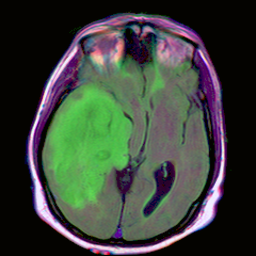

In [14]:
import numpy as np
from PIL import Image
from torchvision import transforms

input_image = Image.open(filename)

input_image

In [0]:
m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=m, std=s),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

with torch.no_grad():
    output = model(input_batch)


print(torch.round(output[0]))

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

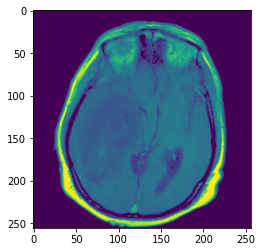

In [36]:
plt.imshow(input_tensor.numpy()[2])

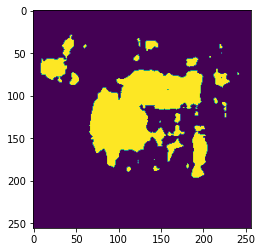

In [39]:
thresh = 0.55
plt.imshow(output[0][0]>thresh)

### References

- [Association of genomic subtypes of lower-grade gliomas with shape features automatically extracted by a deep learning algorithm](http://arxiv.org/abs/1906.03720)
- [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/abs/1505.04597)
- [Brain MRI segmentation dataset](https://www.kaggle.com/mateuszbuda/lgg-mri-segmentation)